In [32]:
import os
print(os.listdir("../input"))


['Integrated.csv']


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn import svm
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential 
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [34]:

tdata = pd.read_csv("../input/Integrated.csv",header=None,na_values=[-9])

new_data = tdata[[2,3,8,9,14,15,16,17,18,31,57]].copy()

new_data.columns = ['Age','Sex','Chest Pain','Blood Pressure','Smoking Years','Fasting Blood Sugar','Diabetes History','Family history Cornory','ECG','Pulse Rate','Target']

print(new_data.info())

new_data['Blood Pressure'].fillna(new_data['Blood Pressure'].mean(),inplace=True)
new_data['Smoking Years'].fillna(new_data['Smoking Years'].mean(),inplace=True)
new_data['Fasting Blood Sugar'].fillna(new_data['Fasting Blood Sugar'].mode()[0],inplace=True)
new_data['Diabetes History'].fillna(new_data['Diabetes History'].mode()[0],inplace=True)
new_data['Family history Cornory'].fillna(new_data['Family history Cornory'].mode()[0],inplace=True)
new_data['ECG'].fillna(new_data['ECG'].mean(),inplace=True)
new_data['Pulse Rate'].fillna(new_data['Pulse Rate'].mean(),inplace=True)


print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 11 columns):
Age                       899 non-null int64
Sex                       899 non-null int64
Chest Pain                899 non-null int64
Blood Pressure            840 non-null float64
Smoking Years             467 non-null float64
Fasting Blood Sugar       809 non-null float64
Diabetes History          95 non-null float64
Family history Cornory    477 non-null float64
ECG                       897 non-null float64
Pulse Rate                844 non-null float64
Target                    899 non-null int64
dtypes: float64(7), int64(4)
memory usage: 77.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 11 columns):
Age                       899 non-null int64
Sex                       899 non-null int64
Chest Pain                899 non-null int64
Blood Pressure            899 non-null float64
Smoking Years             899 non-null float

In [35]:
class0 = new_data.loc[(new_data['Target'] == 0)]
class0 = class0[0:150][:]
class1 = new_data.loc[(new_data['Target'] == 1)]
class2 = new_data.loc[(new_data['Target'] == 2)]
class3 = new_data.loc[(new_data['Target'] == 3)]
class4 = new_data.loc[(new_data['Target'] == 4)]
new_data = class0.append(class1)
new_data = new_data.append(class2)
new_data = new_data.append(class3)
new_data = new_data.append(class4)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 865
Data columns (total 11 columns):
Age                       645 non-null int64
Sex                       645 non-null int64
Chest Pain                645 non-null int64
Blood Pressure            645 non-null float64
Smoking Years             645 non-null float64
Fasting Blood Sugar       645 non-null float64
Diabetes History          645 non-null float64
Family history Cornory    645 non-null float64
ECG                       645 non-null float64
Pulse Rate                645 non-null float64
Target                    645 non-null int64
dtypes: float64(7), int64(4)
memory usage: 60.5 KB
None
              Age         Sex     ...      Pulse Rate      Target
count  645.000000  645.000000     ...      645.000000  645.000000
mean    55.065116    0.826357     ...      135.575892    1.573643
std      9.002007    0.379097     ...       25.768921    1.229649
min     29.000000    0.000000     ...       60.000000    0.000000


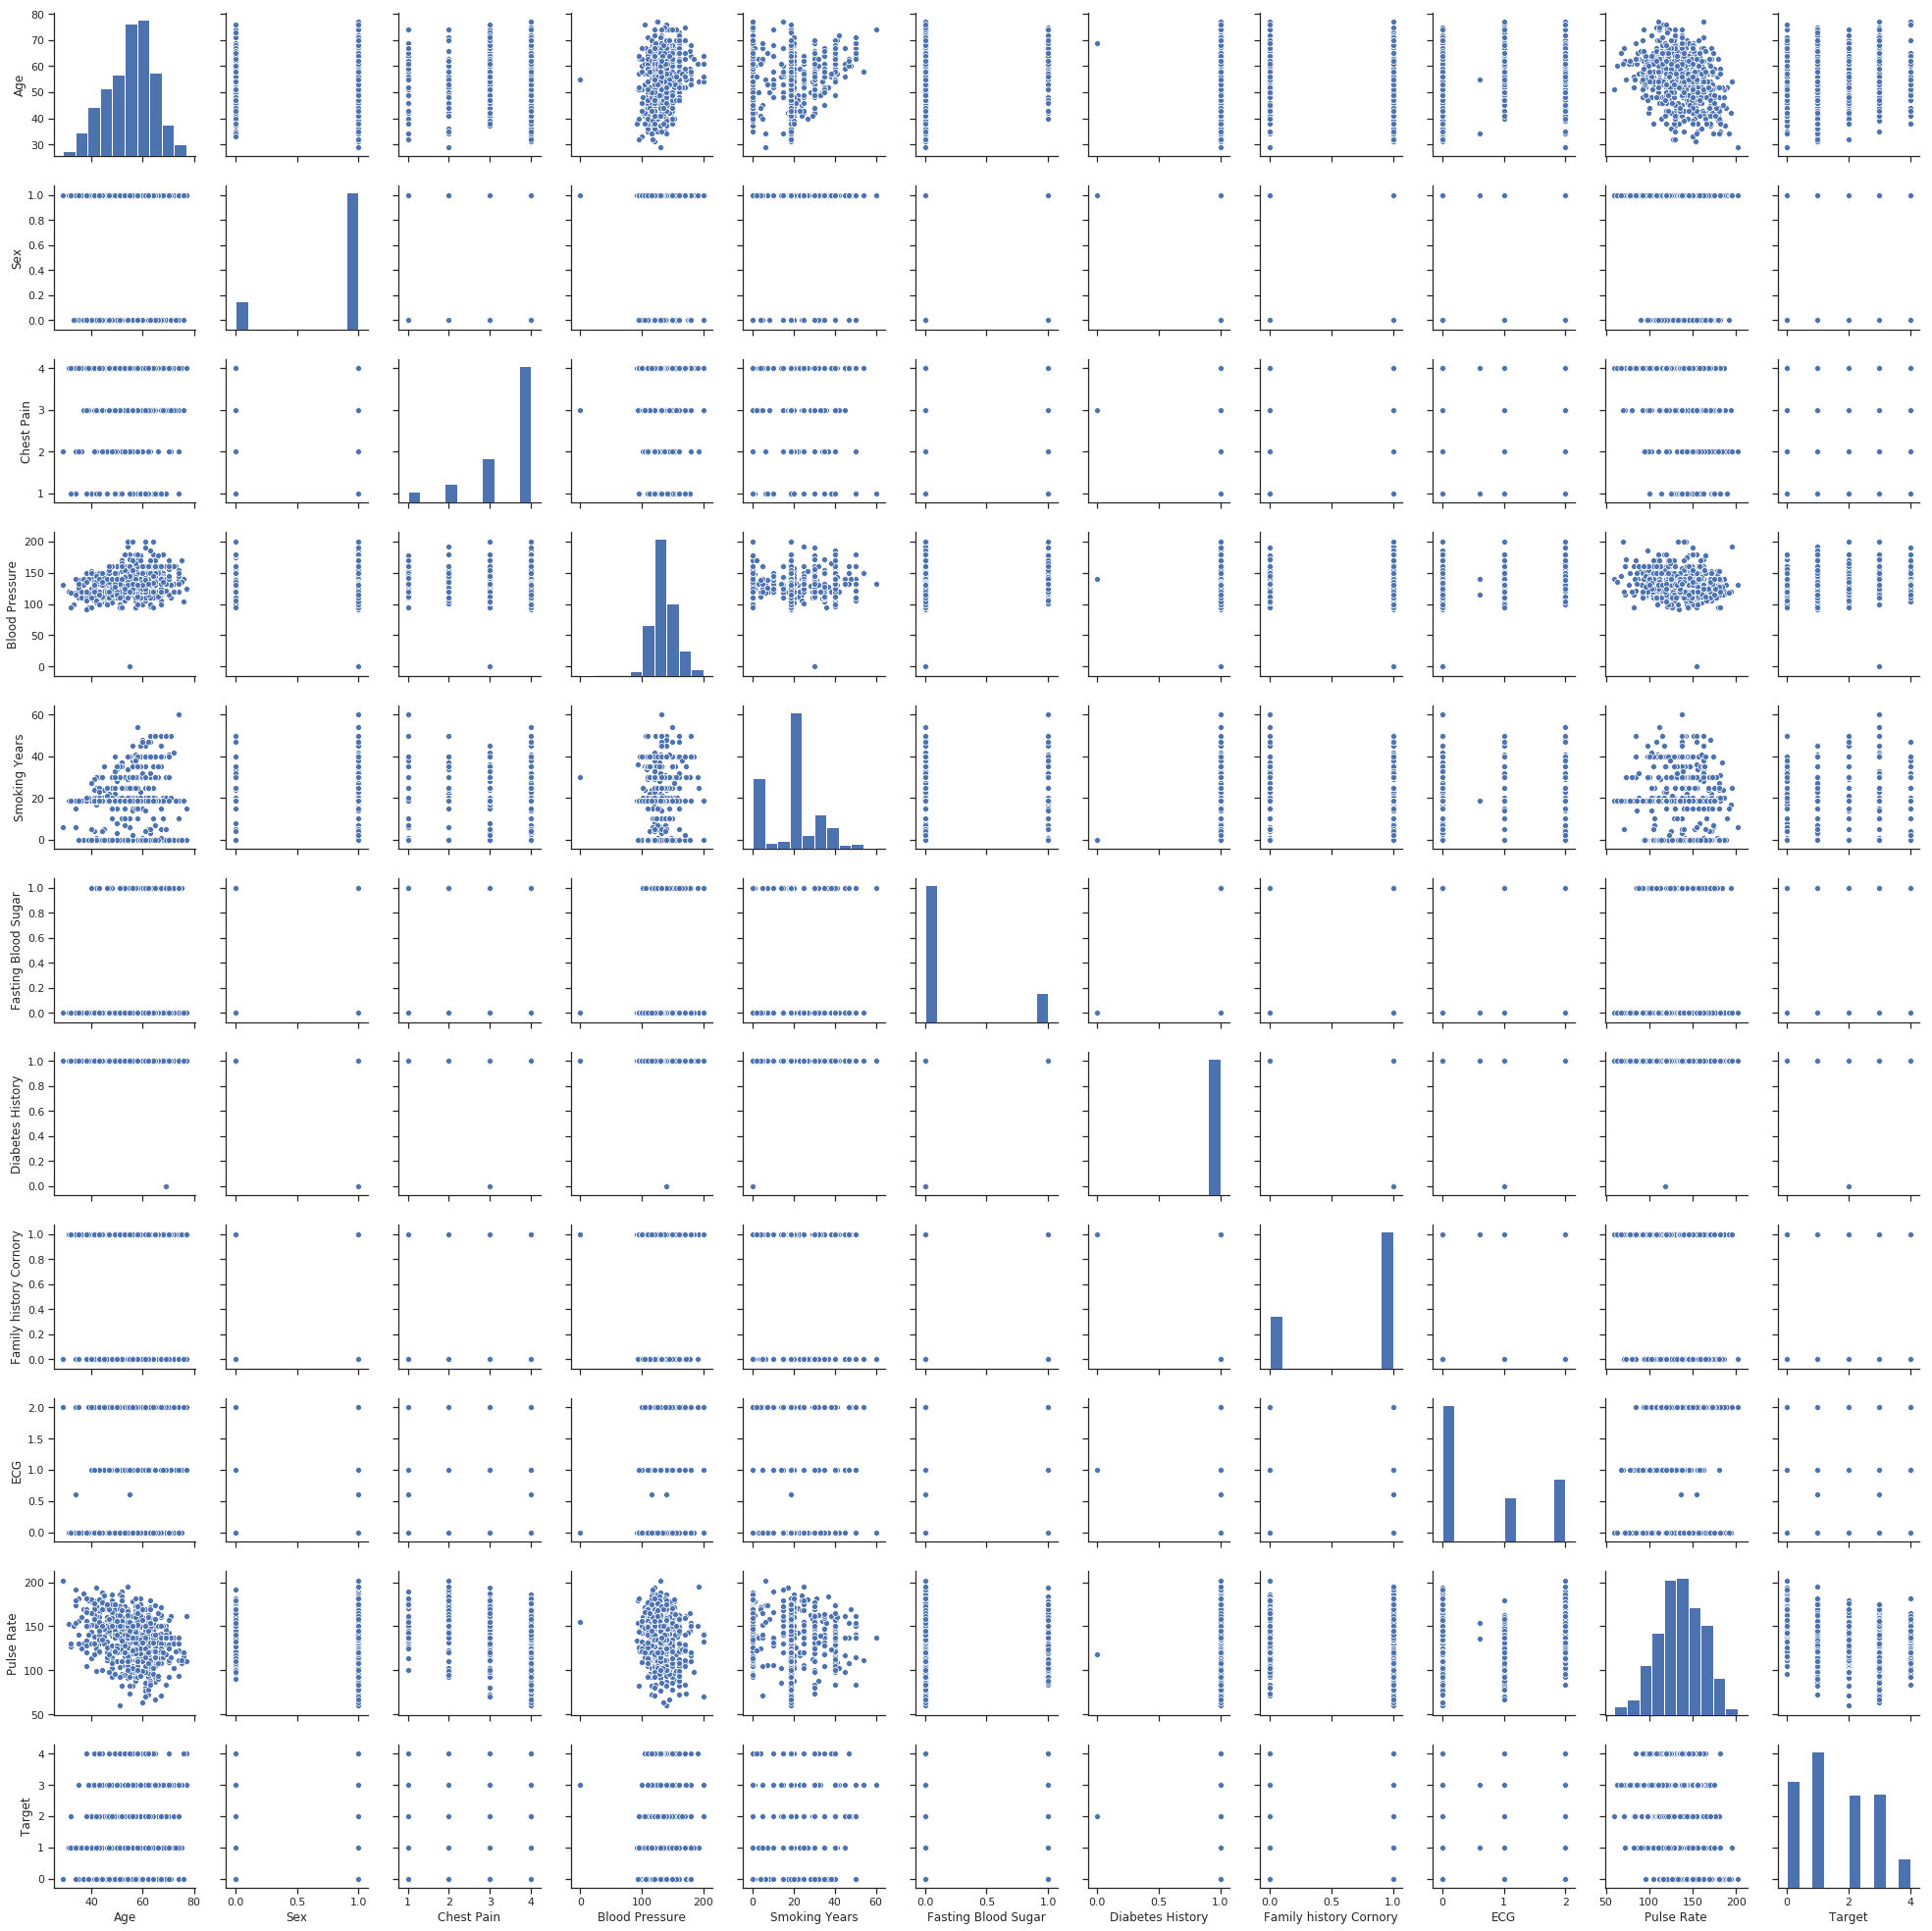

1    191
0    150
3    132
2    130
4     42
Name: Target, dtype: int64


In [36]:

print(new_data.info())
print(new_data.describe())

sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(new_data,palette="husl")
plt.show()


print(new_data['Target'].value_counts())

df_dummies = pd.get_dummies(new_data['Target'])

new_data = pd.concat([new_data , df_dummies], axis=1)
new_data.columns
features = [                   'Age',                    'Sex',
                   'Chest Pain',         'Blood Pressure',
                'Smoking Years',    'Fasting Blood Sugar',
             'Diabetes History', 'Family history Cornory',
                          'ECG',             'Pulse Rate',
                                               0,
                              1,                        2,
                              3,4]


new_data = new_data[features]
#new_data.head()


In [38]:
data = new_data.values

#________ Target and Features Split ______

X = data[:,:-1]
y = data[:,-1]

y = y.reshape((y.shape[0],1))

#_____ Normalization _____

n_X = preprocessing.normalize(X)
n_y = preprocessing.normalize(y)
n_y = n_y.reshape((n_y.shape[0],))

 #__________________  Train_Test_Split ___________________

training_X, testing_X, training_y, testing_y = train_test_split(n_X,n_y,test_size=0.20,random_state=42)

print('Training data: '+str(training_X.shape) +' '+ str(training_y.shape))
print('Testing  data: '+str(testing_X.shape) +' '+str(testing_y.shape))



Training data: (516, 14) (516,)
Testing  data: (129, 14) (129,)


In [39]:
#______________  Using Support Vector Machine _____

print('Support Vector Machine')
clf = svm.SVC(kernel='rbf',C=5,gamma='auto')
clf.fit(training_X,training_y)
r = clf.score(testing_X,testing_y)
print(r)


Support Vector Machine
0.9069767441860465


In [40]:
#_______  Using Logistic Regression _______

print('Logistic Regression')
clf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
clf.fit(training_X,training_y)
clf.predict(testing_X)
r = clf.score(testing_X,testing_y)
print(r)


Logistic Regression
0.9069767441860465


In [41]:
# _____ Using KNN _____
print('K Nearest Neighbors')
K_Values = range(1,26)
scores = {}
scores_l = []

for k in K_Values:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(training_X,training_y)
    y_prediction = knn.predict(testing_X)
    scores[k] = metrics.accuracy_score(testing_y,y_prediction)
    print('for k = ' + str(k) + ' the accuracy is : '+ str(scores[k]))
    scores_l.append(scores[k])

    


K Nearest Neighbors
for k = 1 the accuracy is : 0.8837209302325582
for k = 2 the accuracy is : 0.8837209302325582
for k = 3 the accuracy is : 0.8837209302325582
for k = 4 the accuracy is : 0.8837209302325582
for k = 5 the accuracy is : 0.8837209302325582
for k = 6 the accuracy is : 0.8837209302325582
for k = 7 the accuracy is : 0.8837209302325582
for k = 8 the accuracy is : 0.8837209302325582
for k = 9 the accuracy is : 0.8837209302325582
for k = 10 the accuracy is : 0.8837209302325582
for k = 11 the accuracy is : 0.8837209302325582
for k = 12 the accuracy is : 0.8837209302325582
for k = 13 the accuracy is : 0.8837209302325582
for k = 14 the accuracy is : 0.8837209302325582
for k = 15 the accuracy is : 0.8837209302325582
for k = 16 the accuracy is : 0.8837209302325582
for k = 17 the accuracy is : 0.8837209302325582
for k = 18 the accuracy is : 0.8837209302325582
for k = 19 the accuracy is : 0.8837209302325582
for k = 20 the accuracy is : 0.8837209302325582
for k = 21 the accuracy is : 

In [42]:
training_y = np.expand_dims(training_y, axis=1)

In [43]:

#_______________ Using Neural Net ___________
print('Artificial Neural Net')
model = Sequential()
model.add(Dense(units=32,activation='sigmoid',input_dim=14,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=1024,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=1024,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(training_X,training_y,epochs=50,batch_size=12)


Artificial Neural Net
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
516/516 [==============================] - 2s 4ms/step - loss: 104.5035 - acc: 0.9186
Epoch 2/50
516/516 [==============================] - 0s 259us/step - loss: 81.2653 - acc: 0.9419
Epoch 3/50
516/516 [==============================] - 0s 261us/step - loss: 75.3163 - acc: 0.9419
Epoch 4/50
516/516 [==============================] - 0s 267us/step - loss: 71.4828 - acc: 0.9419
Epoch 5/50
516/516 [==============================] - 0s 274us/step - loss: 68.1908 - acc: 0.9419
Epoch 6/50
516/516 [==============================] - 0s 272us/step - loss: 65.1047 - acc: 0.9419
Epoch 7/50
516/516 [==============================] - 0s 273us/step - loss: 62.1519 - acc: 0.9419
Epoch 8/50
516/516 [==============================] - 0s 276us/step - loss: 59.3607 - acc: 0.9419
Epoch 9/50
516/516 [==============================] - 0s 269us/step - loss: 56.7969 - acc: 0.9419
Epoch 10/50
516/516 [============================

In [44]:
loss_and_metrics = model.evaluate(testing_X,testing_y,batch_size=12)


129/129 [==============================] - 0s 1ms/step


In [45]:
loss_and_metrics


[34.98920671329942, 0.9069767511168192]